In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from scipy.stats import norm
from scipy.stats import t
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from scipy.stats import ttest_ind
plt.style.use('ggplot')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Loading the dataset
data_frame = pd.read_csv('Insurance.csv',  header=[0], index_col=[0])
data_frame.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [3]:
#To check the columns of the dataset
data_frame.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20799 entries, 1 to 20799
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                20799 non-null  object
 1   Age                   20799 non-null  int64 
 2   Driving_License       20799 non-null  int64 
 3   Region_Code           20799 non-null  int64 
 4   Previously_Insured    20799 non-null  int64 
 5   Vehicle_Age           20799 non-null  object
 6   Vehicle_Damage        20799 non-null  object
 7   Annual_Premium        20799 non-null  int64 
 8   Policy_Sales_Channel  20799 non-null  int64 
 9   Vintage               20799 non-null  int64 
 10  Response              20799 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.9+ MB


In [5]:
data_frame['Response'].value_counts()

0    18216
1     2583
Name: Response, dtype: int64

In [6]:
data_frame['Response'].value_counts()

0    18216
1     2583
Name: Response, dtype: int64

# EDA

In [7]:
df_eda = data_frame[['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Damage', 'Vehicle_Age','Response']]

The features 'Gender', 'Driving_License', 'Previously_Insured','Vehicle_Damage' and 'Vehicle_Age' shows a clear dstinction between Response 0 and 1

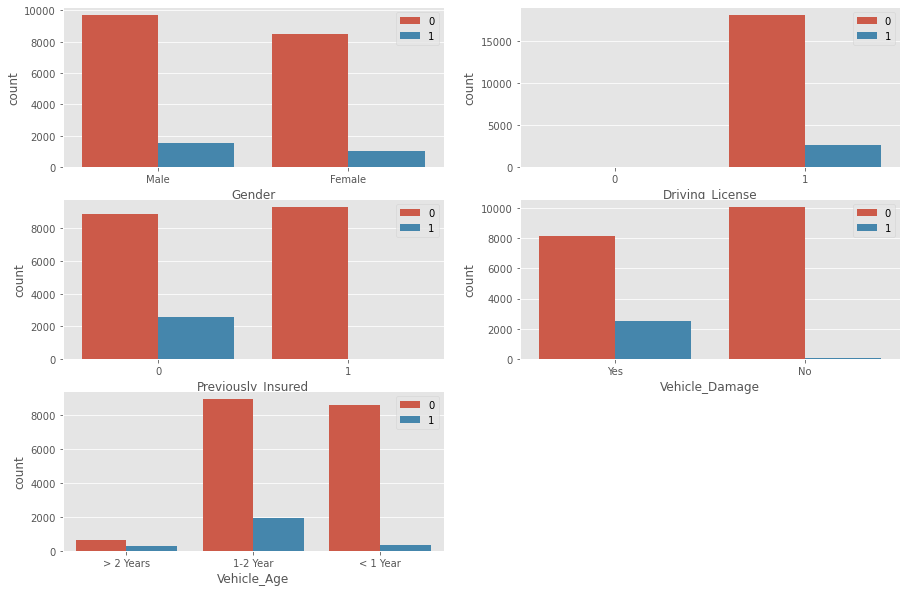

In [8]:
plt.figure(figsize=(15,10))
for i in range(1,6):
    plt.subplot(3,2,i)
    
    sns.countplot(x=df_eda.iloc[:,i-1], hue='Response', data=df_eda,)
    plt. legend(loc='upper right')

 Various region codes shows a clear distinction between Responses 0 and 1. Regions 8 and 28 have a lot of people buying vehicle insurance

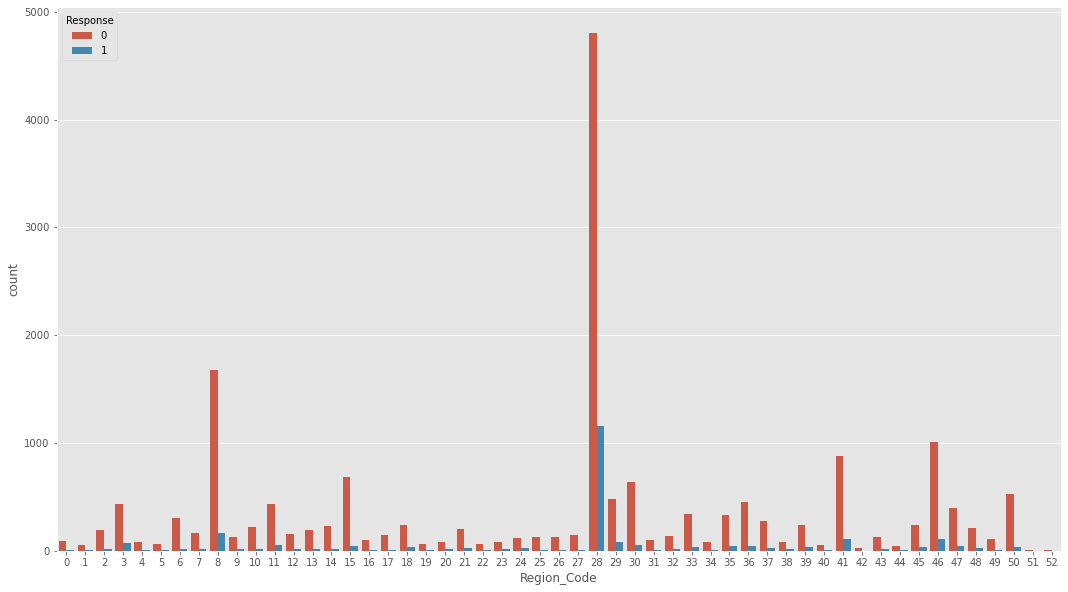

In [9]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Region_Code', hue='Response', data=data_frame)#, palette=["#9b59b6", "#3498db"])
plt.show()

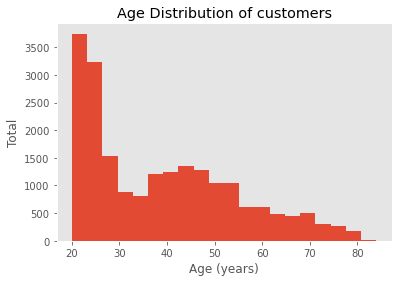

In [10]:
data_frame['Age'].hist(bins=20, grid=False)  # adjust bin width to 5
plt.title("Age Distribution of customers")
plt.xlabel('Age (years)')
plt.ylabel('Total');

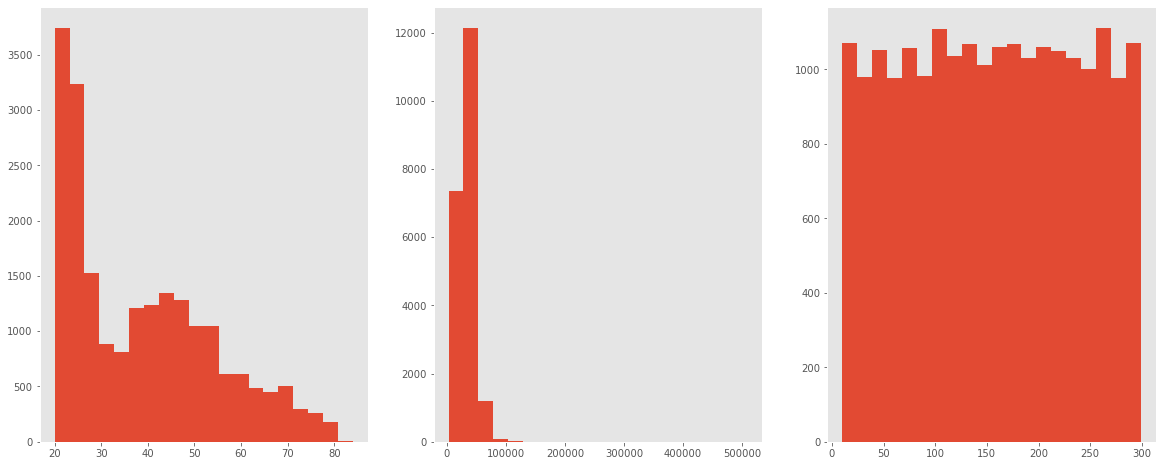

In [11]:
df_dist = data_frame[['Age', 'Annual_Premium', 'Vintage']]
plt.figure(figsize=(20,8))
for i in range(1,4):
    plt.subplot(1,3,i)
    df_dist.iloc[:,i-1].hist(bins=20, grid=False)
     

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

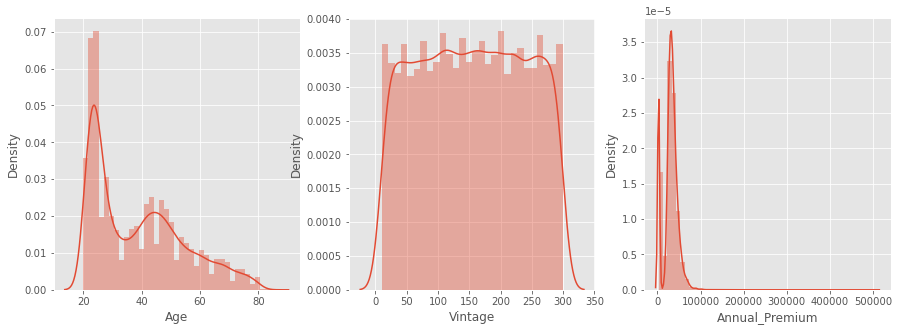

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(data_frame['Age'],kde=True)
plt.subplot(1,3,2)
sns.distplot(data_frame['Vintage'],kde=True)
plt.subplot(1,3,3)
sns.distplot(data_frame['Annual_Premium'],kde=True)

Annual Premium is highly skewed. Hence log transfotrmation has to be done

In [13]:
data_frame['Annual_Premium'] =np.log(data_frame['Annual_Premium'])

In [14]:
data_frame['Policy_Sales_Channel'].nunique()

109

In [15]:
data_frame.drop(['Policy_Sales_Channel', 'Region_Code'],axis=1, inplace=True)

# Hypothesis Testing

In [16]:
# t-Test
## Is there any significant difference between male and female in the Annual premium paid

data1 = data_frame['Annual_Premium'][data_frame['Gender'] =='Male']
data2 = data_frame['Annual_Premium'][data_frame['Gender'] =='Female']
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

# interpret via critical value
if abs(p) >= .05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-0.794, p=0.427
Accept null hypothesis that the means are equal.


In [17]:
# t-Test
#Is there any significant difference between those who bought vehicle insurance and those who did not buy vehicle insurance in the Annual premium paid

data1 = data_frame['Annual_Premium'][data_frame['Response'] ==1]
data2 = data_frame['Annual_Premium'][data_frame['Response'] ==0]
stat, p = ttest_ind(data1, data2)
print('t=%.3f, p=%.3f' % (stat, p))

# interpret via critical value
if abs(p) >= .05:
    print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



t=1.067, p=0.286
Accept null hypothesis that the means are equal.


In [18]:
#Anova
import scipy.stats as stats

stats.f_oneway(data_frame['Annual_Premium'][data_frame['Age'] <= 30],
               data_frame['Annual_Premium'][(data_frame['Age'] >= 30) & (data_frame['Age'] <= 50)],
               data_frame['Annual_Premium'][data_frame['Age'] >= 50])

F_onewayResult(statistic=32.84693485123904, pvalue=5.7092759103637164e-15)

# Cleaning the data


In [19]:
# Convert 'Gender', Driving_License ', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response' into categorical variable

data_frame[['Gender','Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']] = data_frame[['Gender','Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']].astype('category') 


In [20]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20799 entries, 1 to 20799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              20799 non-null  category
 1   Age                 20799 non-null  int64   
 2   Driving_License     20799 non-null  category
 3   Previously_Insured  20799 non-null  category
 4   Vehicle_Age         20799 non-null  category
 5   Vehicle_Damage      20799 non-null  category
 6   Annual_Premium      20799 non-null  float64 
 7   Vintage             20799 non-null  int64   
 8   Response            20799 non-null  category
dtypes: category(6), float64(1), int64(2)
memory usage: 1.4 MB


In [21]:
data_frame.describe()

,Age,Annual_Premium,Vintage
count,20799.000000,20799.000000,20799.000000
mean,38.844704,10.021890,154.868888
std,15.574677,1.000268,83.316034
min,20.000000,7.874739,10.000000
25%,25.000000,10.105367,83.000000
50%,36.000000,10.367976,155.000000
75%,49.000000,10.584765,226.000000
max,84.000000,13.138380,299.000000


No correlation between the variables

<AxesSubplot:>

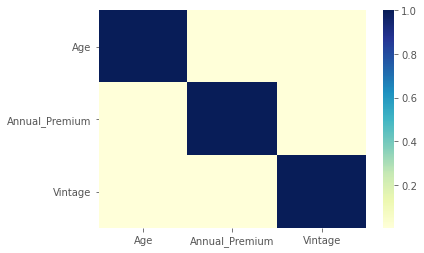

In [22]:
sns.heatmap(data_frame.corr(),cmap="YlGnBu")

In [23]:
#To find the unique count of categorical variable
data_frame['Gender'].value_counts()

Male      11256
Female     9543
Name: Gender, dtype: int64

In [24]:
data_frame['Driving_License'].value_counts()

1    20754
0       45
Name: Driving_License, dtype: int64

In [25]:
data_frame['Previously_Insured'].value_counts()

0    11449
1     9350
Name: Previously_Insured, dtype: int64

In [26]:
data_frame['Vehicle_Age'].value_counts()

1-2 Year     10930
< 1 Year      8994
> 2 Years      875
Name: Vehicle_Age, dtype: int64

In [27]:
data_frame['Vehicle_Damage'].value_counts()

Yes    10668
No     10131
Name: Vehicle_Damage, dtype: int64

In [28]:
 data_frame['Response'].value_counts()

0    18216
1     2583
Name: Response, dtype: int64

In [29]:
 data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20799 entries, 1 to 20799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Gender              20799 non-null  category
 1   Age                 20799 non-null  int64   
 2   Driving_License     20799 non-null  category
 3   Previously_Insured  20799 non-null  category
 4   Vehicle_Age         20799 non-null  category
 5   Vehicle_Damage      20799 non-null  category
 6   Annual_Premium      20799 non-null  float64 
 7   Vintage             20799 non-null  int64   
 8   Response            20799 non-null  category
dtypes: category(6), float64(1), int64(2)
memory usage: 1.4 MB


# Dealing with categorical variables

In [30]:
dummy_df = pd.get_dummies( data_frame.iloc[:,:-1], drop_first=True)
dummy_df.head()
#len(dummy_df.columns)

,Age,Annual_Premium,Vintage,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
id,,,,,,,,,
1,44,10.607921,217,1,1,0,0,1,1
2,76,10.420375,183,1,1,0,0,0,0
3,47,10.553049,27,1,1,0,0,1,1
4,21,10.261826,203,1,1,1,1,0,0
5,29,10.221796,39,0,1,1,1,0,0


In [31]:
x = dummy_df
y = data_frame['Response']
x_train, x_test, y_train, y_test = tts(x, y, train_size=0.7, random_state=1, stratify=y)

### Scaling the data

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(data=x_train_scaled, columns = list(x_train.columns))

x_test_scaled = scaler.transform(x_test)
X_test = pd.DataFrame(data=x_test_scaled, columns = list(x_test.columns))

In [33]:
from sklearn.utils import resample

# concatenate our training data back together
comb = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_insured = comb[comb.Response==0]
insured = comb[comb.Response==1]

# upsample minority
insured_upsampled = resample(insured,
                          replace=True, # sample with replacement
                          n_samples=len(not_insured), # match number in majority class
                          random_state=250) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_insured, insured_upsampled])

# check new class counts
upsampled.Response.value_counts()

1    12751
0    12751
Name: Response, dtype: int64

In [34]:
upsampled_Y = upsampled["Response"]
upsampled_X = upsampled.drop("Response", axis= 1)



# KNN Classifier

In [35]:
#model = RandomizedSearchCV(knn,params,cv=cvals)
knn= KNeighborsClassifier()
knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)

#### Confusion matrix, Classification Report and Accuracy Score

In [36]:

print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test,y_pred)*100) 


[[5217  248]
 [ 646  129]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5465
           1       0.34      0.17      0.22       775

    accuracy                           0.86      6240
   macro avg       0.62      0.56      0.57      6240
weighted avg       0.82      0.86      0.83      6240

85.67307692307692


### ROC Curve and ROC_AUC score

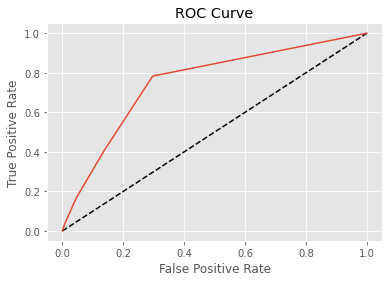

In [37]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [38]:
print(roc_auc_score(y_test, y_pred_prob))

0.7522234748989168


# Logistic Regression

In [39]:
logreg =LogisticRegression()
#logreg.fit(upsampled_X,upsampled_Y )
logreg.fit(X_train ,y_train)
y_pred = logreg.predict(X_test)

#### Confusion matrix, Classification Report and Accuracy Score

In [40]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[5464    1]
 [ 775    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      5465
           1       0.00      0.00      0.00       775

    accuracy                           0.88      6240
   macro avg       0.44      0.50      0.47      6240
weighted avg       0.77      0.88      0.82      6240

87.56410256410257


### ROC Curve and ROC_AUC score

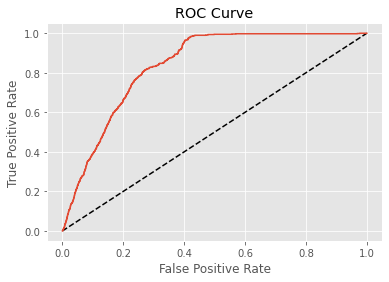

In [41]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
print(roc_auc_score(y_test, y_pred_prob))

0.8364295959625773


# Decision Tree

In [65]:
decision_tree =DecisionTreeClassifier()
#decision_tree.fit(upsampled_X,upsampled_Y )
decision_tree.fit(X_train ,y_train)
y_pred = decision_tree.predict(X_test)

In [66]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[4892  573]
 [ 549  226]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5465
           1       0.28      0.29      0.29       775

    accuracy                           0.82      6240
   macro avg       0.59      0.59      0.59      6240
weighted avg       0.82      0.82      0.82      6240

82.01923076923077


In [67]:
import pickle
pickle.dump( decision_tree,open("loan.pkl", "wb"))

In [73]:
X_test.iloc[5]

Age                      0.031250
Annual_Premium           0.448848
Vintage                  0.020761
Gender_Male              0.000000
Driving_License_1        1.000000
Previously_Insured_1     0.000000
Vehicle_Age_< 1 Year     1.000000
Vehicle_Age_> 2 Years    0.000000
Vehicle_Damage_Yes       1.000000
Name: 5, dtype: float64

In [74]:
x=[0.03,0.4,0.02,0,1,0,1,0,1]
y= decision_tree.predict([x])
y

array([1], dtype=int64)

In [72]:
y_pred[:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

### ROC Curve and ROC_AUC score

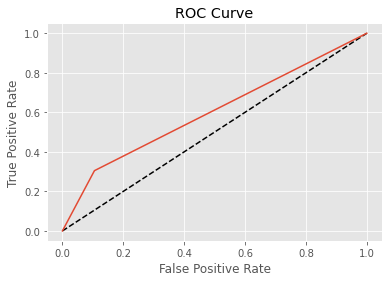

In [47]:
y_pred_prob = decision_tree.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
print(roc_auc_score(y_test, y_pred_prob))

0.5997937608830387


# Naive Bayes Classifier

In [49]:
from sklearn.model_selection import cross_val_score
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[3744 1721]
 [  82  693]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      5465
           1       0.29      0.89      0.43       775

    accuracy                           0.71      6240
   macro avg       0.63      0.79      0.62      6240
weighted avg       0.89      0.71      0.76      6240

71.10576923076923


In [51]:
Cross_validated_ROC_AUC = cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc').mean()
Cross_validated_ROC_AUC

0.8216048302369389

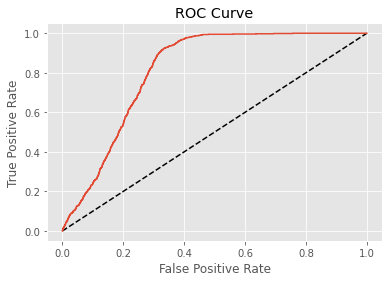

In [52]:
y_pred_prob = nb.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [53]:
print(roc_auc_score(y_test, y_pred_prob))

0.8125273440958592
